In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_table("https://raw.githubusercontent.com/tomerpra/project/main/fruit_data_with_colors.txt")

In [3]:
data

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


# Data Ingestion is done here

In [4]:
# First thing here we can see fruit_label is not useful for our analysis because  its a number given to diffrent fruits
# so we drop it
data.drop(columns="fruit_label",inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_name     59 non-null     object 
 1   fruit_subtype  59 non-null     object 
 2   mass           59 non-null     int64  
 3   width          59 non-null     float64
 4   height         59 non-null     float64
 5   color_score    59 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.9+ KB


Here we have 5 columns. So in this project from mass , width , height and color score we have to predict which fruit is this ?

In [6]:
# lets cheack about null and duplicates values
data.isnull().sum()

fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [7]:
data.duplicated().sum()

0

So we don't have any null and duplicated values . Now we start EDA on this dataframe

In [8]:
data['mass'].value_counts()

116    4
154    4
160    3
156    3
140    2
162    2
164    2
180    2
152    2
80     2
158    2
118    2
172    2
194    1
144    1
200    1
186    1
192    1
216    1
142    1
196    1
174    1
132    1
130    1
150    1
356    1
190    1
210    1
204    1
362    1
342    1
170    1
168    1
166    1
178    1
76     1
84     1
86     1
176    1
120    1
Name: mass, dtype: int64

The dtype of this column is int

In [9]:
dataA = data[data['fruit_name']=='apple']
dataO = data[data['fruit_name']=='orange']
dataL = data[data['fruit_name']=='lemon']
dataM = data[data['fruit_name']=='mandarin']

This data frames are only created for graph analysis

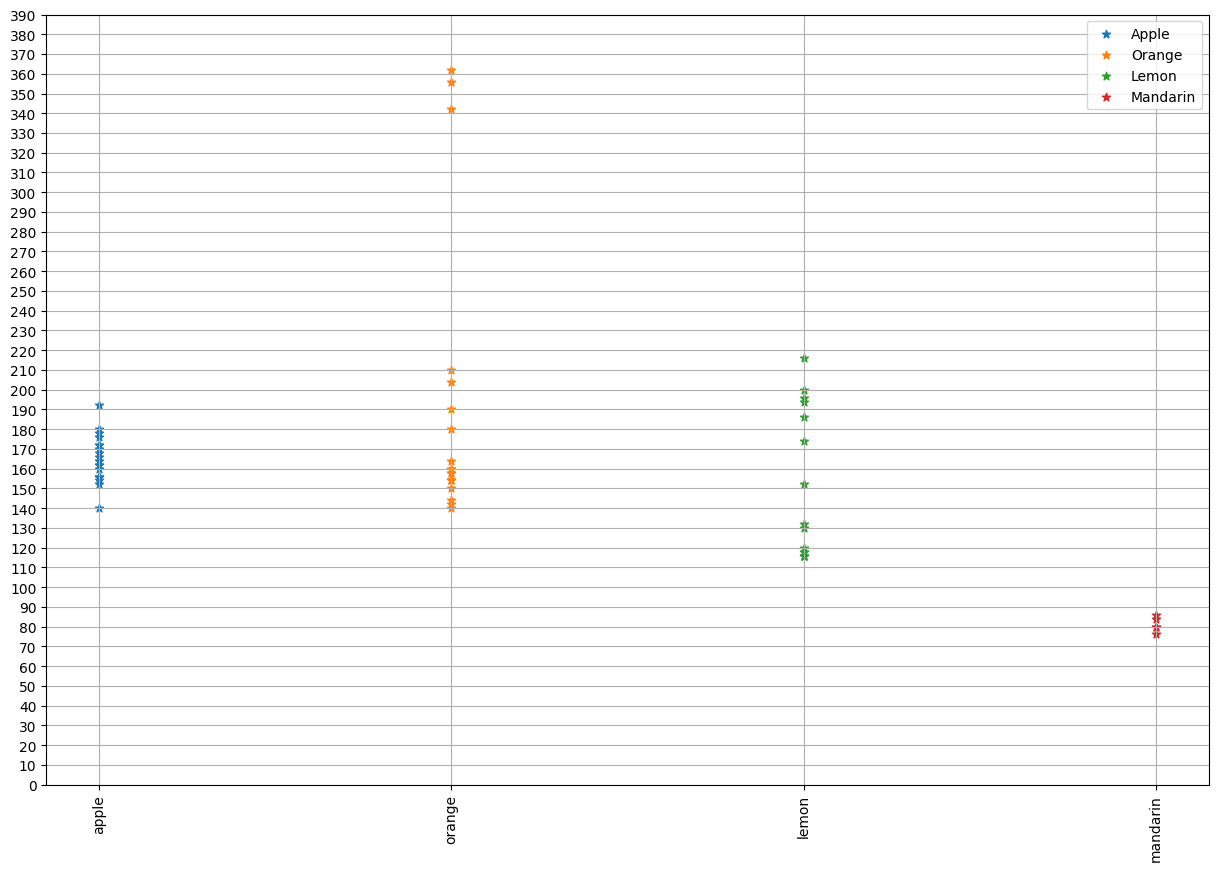

In [10]:
plt.figure(figsize = (15,10))
plt.scatter(dataA['fruit_name'],dataA['mass'],label = 'Apple',marker = '*')
plt.scatter(dataO['fruit_name'],dataO['mass'],label = 'Orange',marker = '*')
plt.scatter(dataL['fruit_name'],dataL['mass'], label = 'Lemon',marker = '*')
plt.scatter(dataM['fruit_name'],dataM['mass'], label = 'Mandarin',marker = '*')
plt.legend()
plt.xticks(rotation=90)
plt.yticks(np.arange(0,400,10))
plt.grid()
plt.show()

This graph shows fruits with less mass (range between 70 to 90) are mandarin and oranges show very large variation in their masses. Apple also have nearly masses between 150 to 180. Lemons are in range 110 to 220

In [11]:
# lets move on to width column
data['width'].value_counts()

7.3    7
7.1    6
7.6    5
7.5    5
7.2    5
7.4    4
6.0    4
5.8    3
5.9    3
6.1    2
7.0    2
8.4    1
6.7    1
6.3    1
6.8    1
7.8    1
7.7    1
9.6    1
9.2    1
9.0    1
8.0    1
6.9    1
6.2    1
6.5    1
Name: width, dtype: int64

This column also has dtype as int , so we don't need to do any filteration

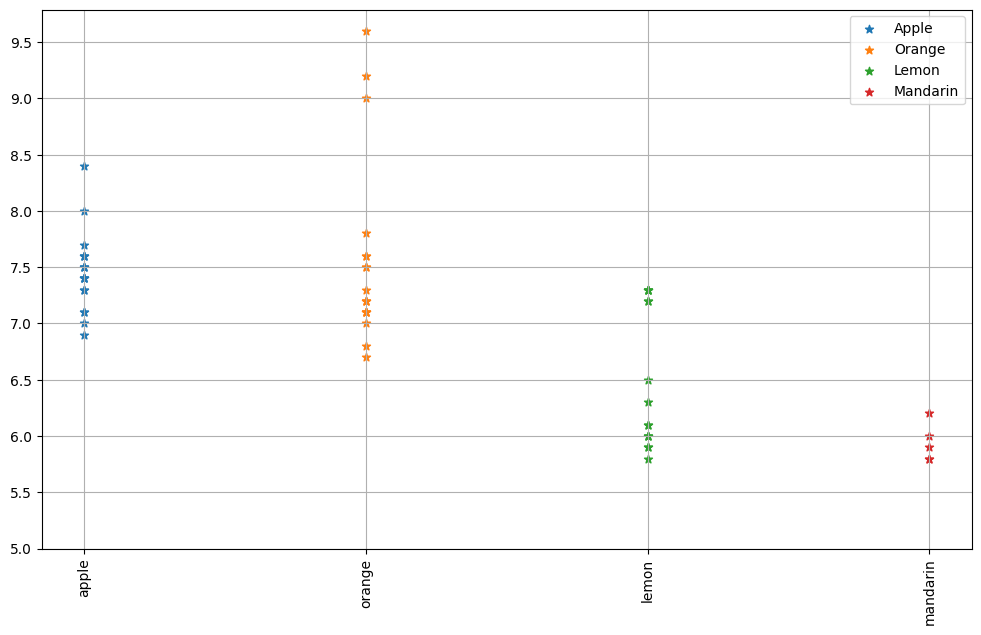

In [12]:
plt.figure(figsize = (12,7))
plt.scatter(dataA['fruit_name'],dataA['width'],label = 'Apple',marker = '*')
plt.scatter(dataO['fruit_name'],dataO['width'],label = 'Orange',marker = '*')
plt.scatter(dataL['fruit_name'],dataL['width'], label = 'Lemon',marker = '*')
plt.scatter(dataM['fruit_name'],dataM['width'], label = 'Mandarin',marker = '*')
plt.legend()
plt.xticks(rotation=90)
plt.yticks(np.arange(5,10,0.5))
plt.grid()
plt.show()

Mandrin have width in range of 5.7 to 6.3. As in mass orange shows very large variation as compared to others they are in range between 6.7 to 9.7 . Apple have range from 6.9 to 8.4 and lemon from 5.7 to 6.5

In [13]:
data['height'].value_counts()

7.5     5
7.1     5
7.3     4
9.2     4
7.2     3
8.1     3
7.8     3
7.4     3
7.6     3
8.2     2
8.0     2
7.9     2
7.7     2
7.0     2
4.3     2
8.5     2
6.8     1
9.4     1
4.0     1
4.6     1
4.7     1
10.3    1
10.5    1
10.2    1
9.7     1
10.1    1
8.7     1
8.4     1
Name: height, dtype: int64

As above it also have dtype as int.

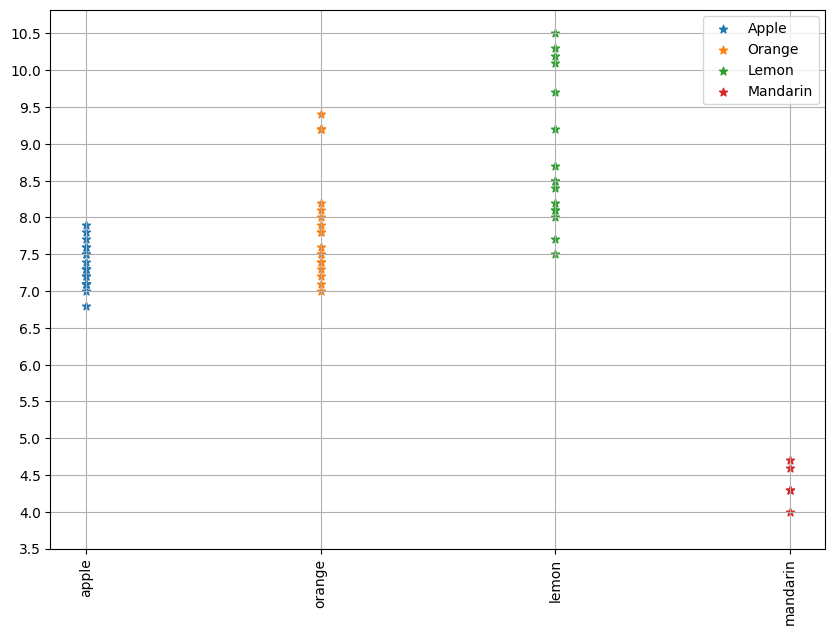

In [14]:
plt.figure(figsize = (10,7))
plt.scatter(dataA['fruit_name'],dataA['height'],label = 'Apple',marker = '*')
plt.scatter(dataO['fruit_name'],dataO['height'],label = 'Orange',marker = '*')
plt.scatter(dataL['fruit_name'],dataL['height'], label = 'Lemon',marker = '*')
plt.scatter(dataM['fruit_name'],dataM['height'], label = 'Mandarin',marker = '*')
plt.legend()
plt.xticks(rotation=90)
plt.yticks(np.arange(3.5,11,0.5))
plt.grid()
plt.show()

Same as mass Mandrin have very less height in range between 4 to 4.75. Apple also don't so very large variation they are in range between 6.75 to 7.9 . Oranges have range 7 to 9.4 and lemon have 7.5 to 10.5

In [15]:
data['color_score'].value_counts()

0.72    9
0.75    5
0.79    4
0.71    3
0.70    3
0.74    3
0.77    3
0.81    3
0.73    3
0.69    2
0.82    2
0.88    2
0.92    2
0.80    2
0.84    1
0.76    1
0.78    1
0.87    1
0.55    1
0.86    1
0.85    1
0.83    1
0.59    1
0.93    1
0.89    1
0.60    1
0.67    1
Name: color_score, dtype: int64

Same as all the values above it also have dtype as int.

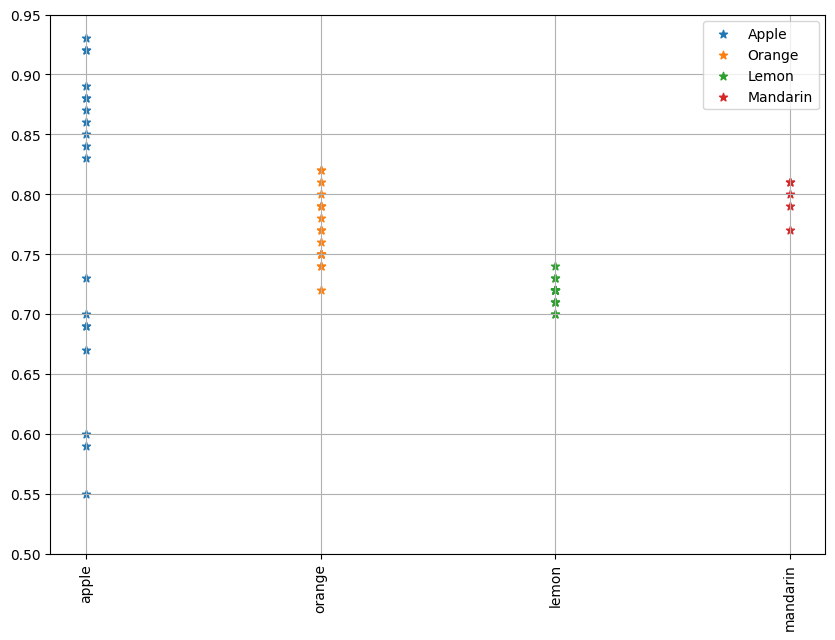

In [16]:
plt.figure(figsize = (10,7))
plt.scatter(dataA['fruit_name'],dataA['color_score'],label = 'Apple',marker = '*')
plt.scatter(dataO['fruit_name'],dataO['color_score'],label = 'Orange',marker = '*')
plt.scatter(dataL['fruit_name'],dataL['color_score'], label = 'Lemon',marker = '*')
plt.scatter(dataM['fruit_name'],dataM['color_score'], label = 'Mandarin',marker = '*')
plt.legend()
plt.xticks(rotation=90)
plt.yticks(np.arange(0.5,1,0.05))
plt.grid()
plt.show()

Mandrin and lemon show very less variation in color score lemon has range between 0.7 to 0.74 and mandrin have 0.77 to 0.82 . Orange are in range between 0.72 to 0.83 . Apple shows very large variation in color score they have range from 0.55 to 0.95 .

In [17]:
# In above analysis we see the maximum counts of diffrent variables, Lets check which fruit have maximum counts
data['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

Here we see diffrent fruits don't show so much variation in counts exept mandarin which is lowest , but all other nearly have same counts

In [18]:
data.sample()

,fruit_name,fruit_subtype,mass,width,height,color_score
1,apple,granny_smith,180,8.0,6.8,0.59


So we cover all the columns

In [19]:
data

,fruit_name,fruit_subtype,mass,width,height,color_score
0,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
2,apple,granny_smith,176,7.4,7.2,0.60
3,mandarin,mandarin,86,6.2,4.7,0.80
4,mandarin,mandarin,84,6.0,4.6,0.79
5,mandarin,mandarin,80,5.8,4.3,0.77
6,mandarin,mandarin,80,5.9,4.3,0.81
7,mandarin,mandarin,76,5.8,4.0,0.81
8,apple,braeburn,178,7.1,7.8,0.92
9,apple,braeburn,172,7.4,7.0,0.89


Here one thing we see dataset only have 58 counts , so we don't need to separate them for testing and training purpose. We do this for large dataset

In [20]:
# now we separte datset in form of input and output
x = data.iloc[:,2:6].values

In [21]:
x

array([[192.  ,   8.4 ,   7.3 ,   0.55],
       [180.  ,   8.  ,   6.8 ,   0.59],
       [176.  ,   7.4 ,   7.2 ,   0.6 ],
       [ 86.  ,   6.2 ,   4.7 ,   0.8 ],
       [ 84.  ,   6.  ,   4.6 ,   0.79],
       [ 80.  ,   5.8 ,   4.3 ,   0.77],
       [ 80.  ,   5.9 ,   4.3 ,   0.81],
       [ 76.  ,   5.8 ,   4.  ,   0.81],
       [178.  ,   7.1 ,   7.8 ,   0.92],
       [172.  ,   7.4 ,   7.  ,   0.89],
       [166.  ,   6.9 ,   7.3 ,   0.93],
       [172.  ,   7.1 ,   7.6 ,   0.92],
       [154.  ,   7.  ,   7.1 ,   0.88],
       [164.  ,   7.3 ,   7.7 ,   0.7 ],
       [152.  ,   7.6 ,   7.3 ,   0.69],
       [156.  ,   7.7 ,   7.1 ,   0.69],
       [156.  ,   7.6 ,   7.5 ,   0.67],
       [168.  ,   7.5 ,   7.6 ,   0.73],
       [162.  ,   7.5 ,   7.1 ,   0.83],
       [162.  ,   7.4 ,   7.2 ,   0.85],
       [160.  ,   7.5 ,   7.5 ,   0.86],
       [156.  ,   7.4 ,   7.4 ,   0.84],
       [140.  ,   7.3 ,   7.1 ,   0.87],
       [170.  ,   7.6 ,   7.9 ,   0.88],
       [342.  , 

In ML model input is in 2D array form , and here we do same for ML model creation

In [22]:
y = data.iloc[:,0].values

In [23]:
y

array(['apple', 'apple', 'apple', 'mandarin', 'mandarin', 'mandarin',
       'mandarin', 'mandarin', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'lemon', 'lemon',
       'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon',
       'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon'],
      dtype=object)

# Now we import Diffrent ML model

In [24]:
# First thing is we don't need ColumnTransformer,Pipeline,OneHotEncoder because out all input are int type
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

These are diffrent ML model , now we cheak all of them and which one has maximum efficiency we use that.

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

For cheacking efficiency

In [26]:
#KNN Classifier
model = KNeighborsClassifier(n_neighbors = 2,metric = 'euclidean')
model.fit(x,y)
y_predict = model.predict(x)

In [27]:
print("Accuracy Score : ",accuracy_score(y,y_predict))
print("Classification Report : ")
print(classification_report(y,y_predict))
print("Confution Matrix : ")
print(confusion_matrix(y,y_predict))

Accuracy Score :  0.847457627118644
Classification Report : 
              precision    recall  f1-score   support

       apple       0.70      1.00      0.83        19
       lemon       0.93      0.88      0.90        16
    mandarin       1.00      1.00      1.00         5
      orange       1.00      0.63      0.77        19

    accuracy                           0.85        59
   macro avg       0.91      0.88      0.88        59
weighted avg       0.89      0.85      0.85        59

Confution Matrix : 
[[19  0  0  0]
 [ 2 14  0  0]
 [ 0  0  5  0]
 [ 6  1  0 12]]


# This model have 84.745% Accuracy

In [28]:
# LogisticRegression
model = LogisticRegression()
model.fit(x,y)
y_predict = model.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print("Accuracy Score : ",accuracy_score(y,y_predict))
print("Classification Report : ")
print(classification_report(y,y_predict))
print("Confution Matrix : ")
print(confusion_matrix(y,y_predict))

Accuracy Score :  0.8305084745762712
Classification Report : 
              precision    recall  f1-score   support

       apple       0.71      0.79      0.75        19
       lemon       1.00      1.00      1.00        16
    mandarin       1.00      1.00      1.00         5
      orange       0.76      0.68      0.72        19

    accuracy                           0.83        59
   macro avg       0.87      0.87      0.87        59
weighted avg       0.83      0.83      0.83        59

Confution Matrix : 
[[15  0  0  4]
 [ 0 16  0  0]
 [ 0  0  5  0]
 [ 6  0  0 13]]


# 83.05% Accuracy

In [30]:
# DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_split=4)
model.fit(x,y)
y_predict = model.predict(x)
print("Accuracy Score : ",accuracy_score(y,y_predict))
print("Classification Report : ")
print(classification_report(y,y_predict))
print("Confution Matrix : ")
print(confusion_matrix(y,y_predict))

Accuracy Score :  0.9830508474576272
Classification Report : 
              precision    recall  f1-score   support

       apple       1.00      0.95      0.97        19
       lemon       1.00      1.00      1.00        16
    mandarin       1.00      1.00      1.00         5
      orange       0.95      1.00      0.97        19

    accuracy                           0.98        59
   macro avg       0.99      0.99      0.99        59
weighted avg       0.98      0.98      0.98        59

Confution Matrix : 
[[18  0  0  1]
 [ 0 16  0  0]
 [ 0  0  5  0]
 [ 0  0  0 19]]


# 98.30% Accuracy

In [31]:
# RandomForestClassifier
model = RandomForestClassifier(n_estimators=4)
model.fit(x,y)
y_predict = model.predict(x)
print("Accuracy Score : ",accuracy_score(y,y_predict))
print("Classification Report : ")
print(classification_report(y,y_predict))
print("Confution Matrix : ")
print(confusion_matrix(y,y_predict))

Accuracy Score :  0.9830508474576272
Classification Report : 
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
       lemon       0.94      1.00      0.97        16
    mandarin       1.00      1.00      1.00         5
      orange       1.00      0.95      0.97        19

    accuracy                           0.98        59
   macro avg       0.99      0.99      0.99        59
weighted avg       0.98      0.98      0.98        59

Confution Matrix : 
[[19  0  0  0]
 [ 0 16  0  0]
 [ 0  0  5  0]
 [ 0  1  0 18]]


# 98.30% Acuuracy

In [32]:
# GaussianNB
model = GaussianNB()
model.fit(x,y)
y_predict = model.predict(x)
print("Accuracy Score : ",accuracy_score(y,y_predict))
print("Classification Report : ")
print(classification_report(y,y_predict))
print("Confution Matrix : ")
print(confusion_matrix(y,y_predict))

Accuracy Score :  0.847457627118644
Classification Report : 
              precision    recall  f1-score   support

       apple       0.70      1.00      0.83        19
       lemon       0.94      1.00      0.97        16
    mandarin       1.00      1.00      1.00         5
      orange       1.00      0.53      0.69        19

    accuracy                           0.85        59
   macro avg       0.91      0.88      0.87        59
weighted avg       0.89      0.85      0.84        59

Confution Matrix : 
[[19  0  0  0]
 [ 0 16  0  0]
 [ 0  0  5  0]
 [ 8  1  0 10]]


# 84.74% Accuracy

So maximum accuracy is showed by RandomForestClassifier and DecisionTreeClassifier. We use one of them for our model.

In [33]:
# RandomForestClassifier
model = RandomForestClassifier(n_estimators=4)
model.fit(x,y)

RandomForestClassifier(n_estimators=4)

In [34]:
import joblib
joblib.dump(model,"Pranshu's Project")         # Here we dump our mpdel

["Pranshu's Project"]

In [35]:
# Now we install streamlit for app making
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


# App Making On Streamlit

In [36]:
%%writefile fruit.py
import streamlit as st
import joblib

st.title(":green[Fruit Predictor] :lemon::apple:")
st.text("This app predict the fruit name based on their physical properties.")

model = joblib.load("Pranshu's Project")

st.subheader("Slide to select : ")

height = st.slider("Height",min_value = 3.0, max_value = 12.0,value = 6.3, step = 0.1)
width = st.slider("Width",min_value = 5.0, max_value = 10.0,value = 7.0, step = 0.1)
mass = st.slider("Mass",min_value = 70, max_value = 400,value = 260, step = 1)
color_score = st.slider("Color Score",min_value = 0.5, max_value = 1.0,value = 0.7, step = 0.01)

if st.button("Predict"):
   ans = model.predict([[mass,width,height,color_score]])
   st.subheader("According to your given information , Fruit is "+ans[0]+".")
   st.text("Thanks For Using, Presented by Pranshu Tomer")

Writing fruit.py


In [ ]:
!streamlit run fruit.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.16.231:8501

  Stopping...
^C


* First we created dataframe by the help of pandas.
* Then we check null and duplicated values.
* Now we do EDA for every column.
* We draw graphs with help of matplotlib and analysis the diffrent physical properties what mass they, which color and how much variation they can show.
* Then we imported diffrent Machine Learning models and check their accuracy. At last we use model with highest accuraly.
* We imported joblib and dump out model their.
* At final stage we created app with the help of Streamlit and import out model their.